# Spotify Playlist Clustering and Recommendation

# Overview

The goal of this project is to examine and predict groupings of songs within a given Spotify playlist by employing machine learning methodologies such as K-means clustering and Principal Component Analysis (PCA). Through identifying patterns and associations in the musical attributes, the algorithm can form song groupings that exhibit similar qualities, allowing for the generation of customized playlists tailored to user's preferences and listening patterns.

The main objective of this project is to improve user experience on Spotify designing playlists that align with user's unique tastes. This project seeks to pinpoint song groupings that can serve as the basis for assembling playlists with a consistent theme or genre. This approach not only contributes to a more enjoyable and engaging listening experience for users, but it also benefits artists and content creators by introducing their music to an audience whose preferences align with their work.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer


# Loading Data

For this project I used Kaggle's Spotify data. This data is also accesible through Spotify's API connection but for reproducibility I used this dataset from Kaggle.
-https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

In [12]:
spotify_df = pd.read_csv('Data/SpotifyFeatures.csv')

In [13]:
spotify_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# EDA

### Data Overview

About the dataset variables:

- Genre: The category or style of music.
- Artist Name: The name of the artist or group performing the track.
- Track Name: The title of the track.
- Track ID: A unique identifier for the track.
- Popularity: The level of popularity or fame of the track.
- Acousticness: A measure of how likely the track is to be acoustic, ranging from 0.0 to 1.0.
- Danceability: A rating of how suitable a track is for dancing, from 0.0 (least) to 1.0 (most).
- Duration (ms): The length of the track in milliseconds.
- Energy: A measure of the track's intensity and activity, ranging from 0.0 to 1.0.
- Instrumentalness: A prediction of whether the track has vocals, with values closer to 1.0 indicating a higher likelihood of being instrumental.
- Key: The estimated main key of the track, using Pitch Class notation.
- Liveness: A measure of the likelihood that the track was performed live, with values above 0.8 indicating a high probability.
- Loudness: The average loudness of the track in decibels (dB), typically ranging from -60 to 0.
- Mode: The modality of the track, with 1 representing major and 0 representing minor.
- Speechiness: A measure of the presence of spoken words in the track, with values closer to 1.0 indicating more speech content.
- Tempo: The estimated tempo of the track in beats per minute (BPM).
- Time Signature: The overall time signature of the track, indicating the number of beats in each measure.
- Valence: A measure of the track's emotional positiveness, ranging from 0.0 (negative) to 1.0 (positive).

In [15]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [16]:
spotify_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


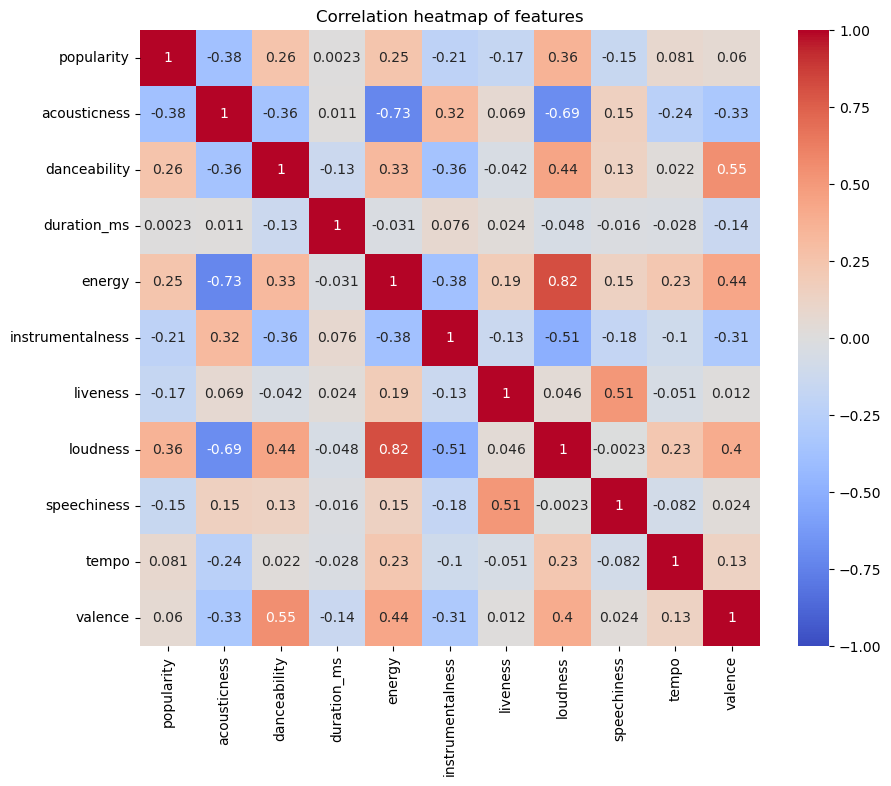

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(spotify_df[features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap of features')
plt.show()

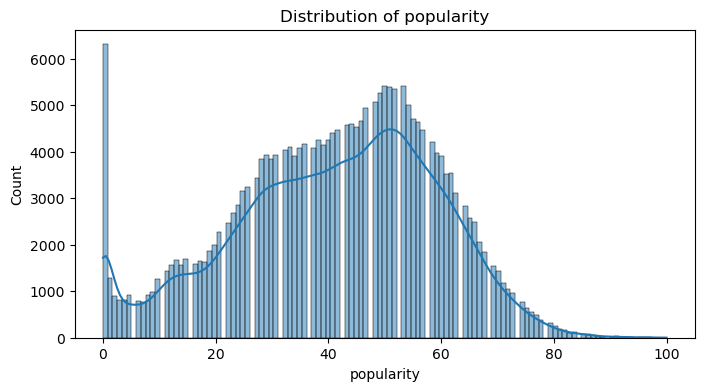

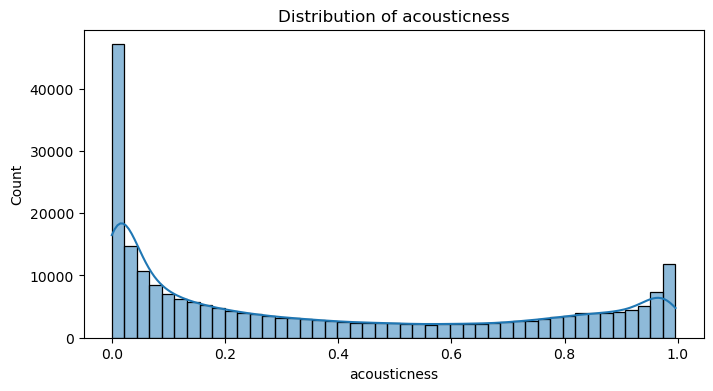

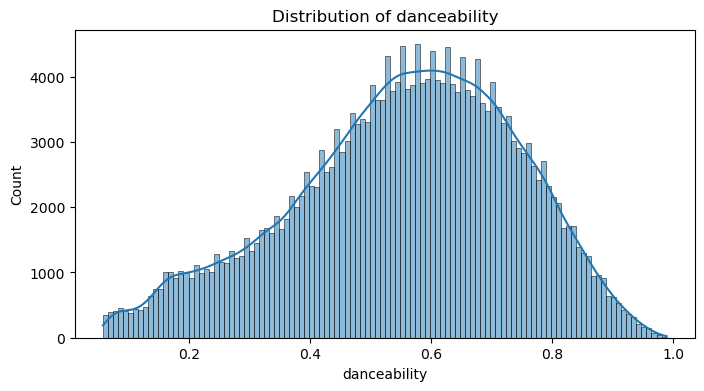

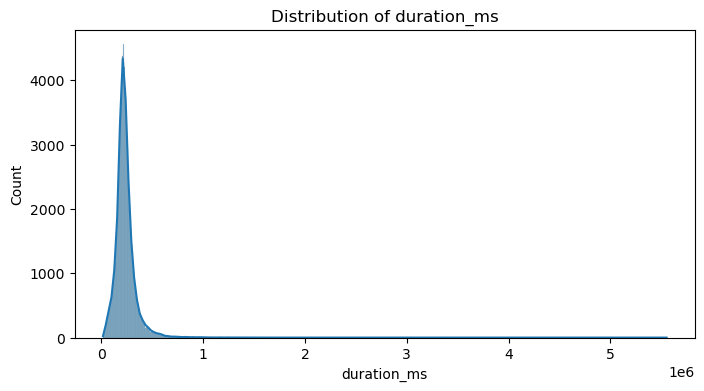

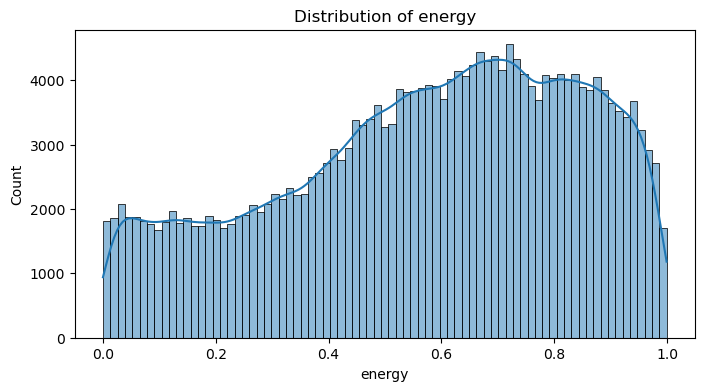

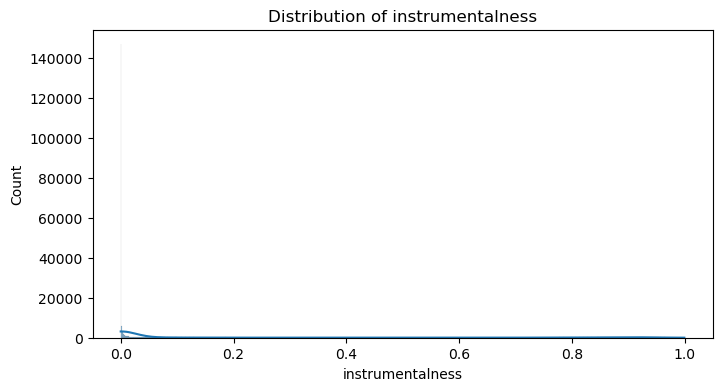

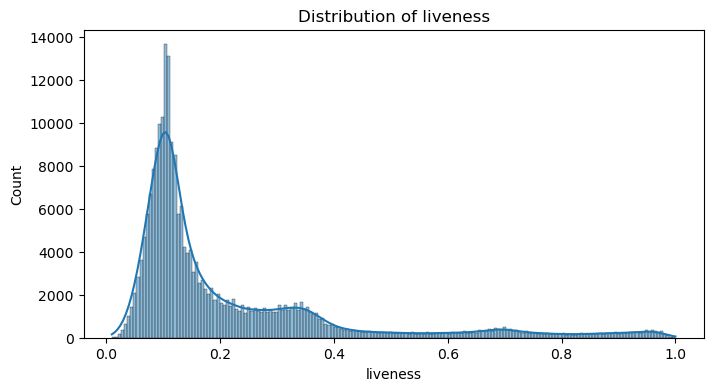

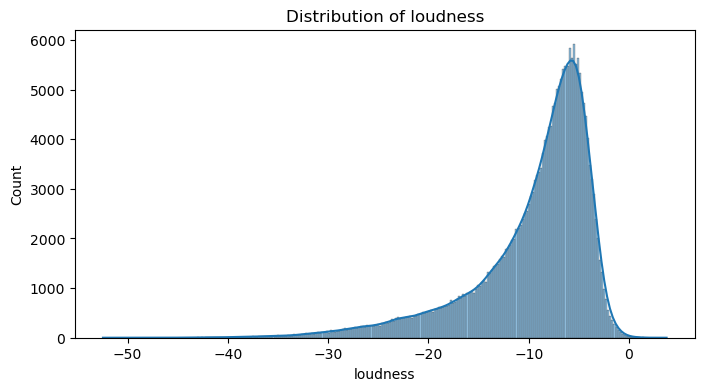

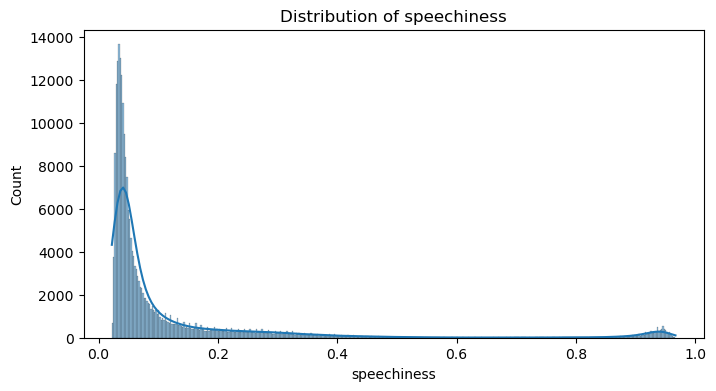

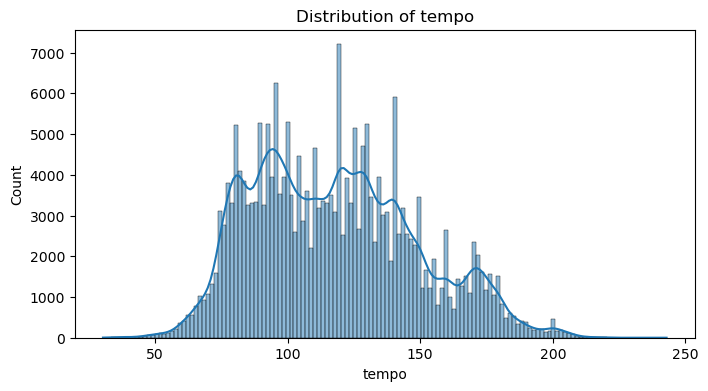

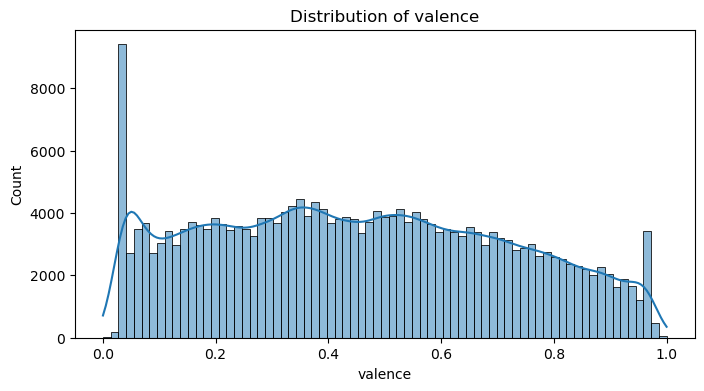

In [24]:
for column in spotify_df.columns:
    # Check if the data type of the column is numeric (int64 or float64)
    if spotify_df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=spotify_df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# Feature Selection

For the features I narrowed it down to the aspects of a song that are audio features so that the clusters can group the data's that are closely realted musically. 

In [25]:
# Features List
model_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [26]:
X = spotify_df[model_features]

In [27]:
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...
232720,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


# Dimensionality Reduction (PCA) 

PCA is a dimensionality reduction technique that aims to transform high-dimensional data into a lower-dimensional representation while preserving most of the original data's variability. 

In [35]:
# Scale data for Principal Component Analysis
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [37]:
# PCA Reduction
pca = PCA()
pca.fit(X_scaled)

PCA()

In [42]:
# Number of components
pca.n_components_

9

In [38]:
# Show variance for each feature
explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio

array([0.38312835, 0.18022703, 0.12051695, 0.0931995 , 0.07730062,
       0.05805277, 0.04399771, 0.03076956, 0.01280752])

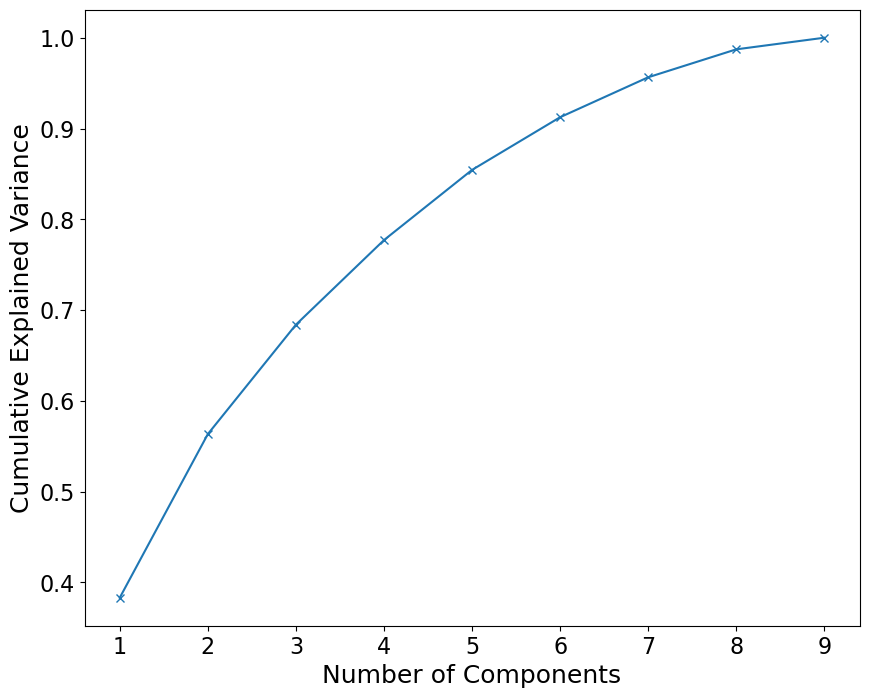

In [41]:
# Finds optimal number of Components and Graph
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(X.columns)+1), explained_var_ratio.cumsum(), marker='x')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [76]:
# Finds optimal number of Components and Graph
for i, explained_var in enumerate(explained_var_ratio.cumsum()):
    if explained_var >= 0.9:
        optimal_n_components = i + 1
        break
        
print(optimal_n_components)

6


In [77]:
# Use the optimal components from above
pca = PCA(n_components=optimal_n_components)
audio_pca = pca.fit_transform(X_scaled)

### Elbow Curve

The elbow method is a heuristic technique used to determine the optimal number of clusters (K) for the K-means clustering algorithm. 

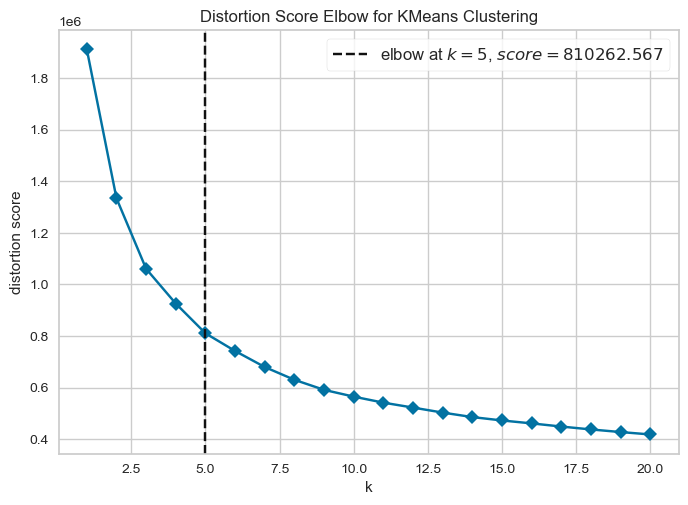

Optimal number of clusters: 5


In [78]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=1), k=(1,21), timings=False)
visualizer.fit(audio_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)


# K-Means Model

In [96]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=1)
kmeans_model.fit(audio_pca)

labels = pd.DataFrame(kmeans_model.labels_)
inertia = kmeans_model.inertia_
sil_score = silhouette_score(audio_pca, labels)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
print(inertia)
print(sil_score)

810265.3510519555
0.22318953452989496


##### Note
- Inertia is a measure of how far the data points within a cluster are from the cluster's centroid. Inertia represents the overall compactness of the clusters. A lower inertia value indicates that data points within a cluster are closer to their respective centroids, which generally suggests better clustering results. 

- The silhouette score is a measure of how well a data point fits within its assigned cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better clustering performance. 

In [80]:
labels = pd.DataFrame(kmeans_model.labels_)

In [81]:
kmean_final_df = pd.concat([X.reset_index(drop=True), pd.DataFrame(kmeans_model.labels_) ], axis=1)

kmean_final_df.columns.values[(-1*optimal_n_components):] = ["Comp. " + str(i+1) for i in range(optimal_n_components)]
kmean_final_df['Cluster'] = labels

kmean_final_df


,acousticness,danceability,energy,instrumentalness,Comp. 1,Comp. 2,Comp. 3,Comp. 4,Comp. 5,Comp. 6,Cluster
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,0,0
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,0,0
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,3,3
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,3,3
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,3,3
...,...,...,...,...,...,...,...,...,...,...,...
232720,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962,2,2
232721,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,2,2
232722,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813,3,3
232723,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489,2,2


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


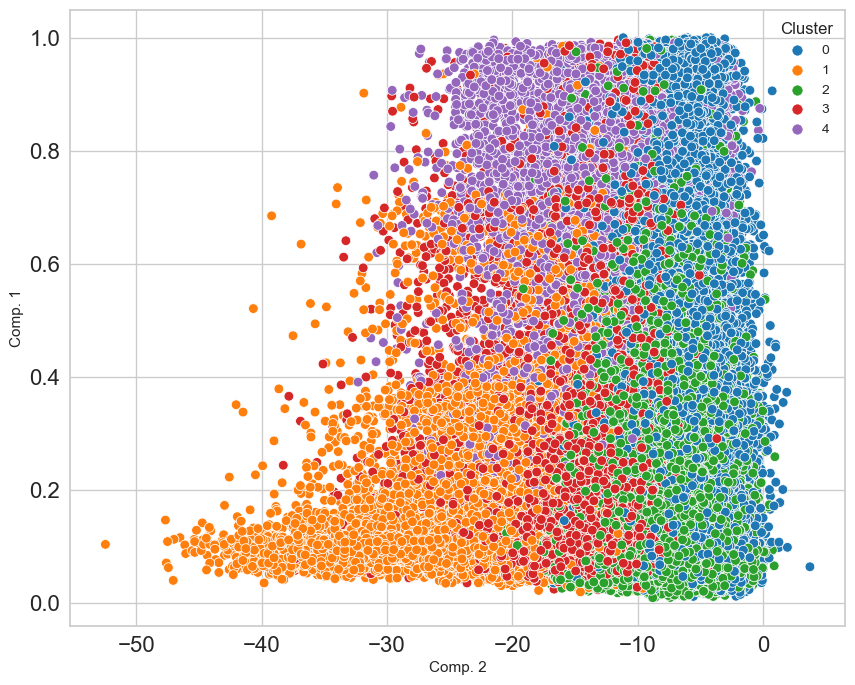

In [83]:
x = kmean_final_df['Comp. 2']
y = kmean_final_df['Comp. 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=kmean_final_df['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [98]:
#Assign Cluster back to original Dataframe
spotify_df['Cluster'] = kmean_final_df['Cluster']
spotify_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,3
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,2
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,2
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,3
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,2


# Cluster Based Playlist of 20 Songs for Cluster 2

In [101]:
# Create a Playlist of all the cluster 2 labeled songs
Playlist_Cluster_3 = spotify_df[spotify_df['Cluster'] == 2]

Playlist_Cluster_3.sample(20)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
189217,Ska,The Slackers,Make Me Smile,7qa7XgZQ47VVvxqhpy9piI,16,0.12300,0.702,260760,0.691,0.006650,C#,0.1010,-6.226,Major,0.0412,129.794,4/4,0.922,2
25915,Electronic,Slushii,Some Nights,09wuKc7dpAconTg0jfqVIB,37,0.02480,0.708,142439,0.544,0.003900,C#,0.1200,-8.042,Major,0.0368,123.015,4/4,0.212,2
69427,Hip-Hop,J. Cole,Chaining Day,5A0NEY8GOCB3ErRSRPpY72,58,0.27900,0.625,284507,0.642,0.000001,C,0.1030,-7.291,Major,0.1680,84.544,4/4,0.333,2
39101,Electronic,Kermesse,Nostalgia - Mira & Chris Schwarzwalder Remix,6wM6yjwIrCWCszultuQppG,36,0.06790,0.809,450000,0.703,0.853000,B,0.0891,-8.131,Minor,0.0655,112.017,4/4,0.428,2
116441,Rap,Bone Thugs-N-Harmony,Foe Tha Love of $,1muLq1kBLWIT3pmNC2xl0g,57,0.00295,0.772,272440,0.695,0.000000,G,0.4270,-8.013,Major,0.0735,137.868,1/4,0.643,2
188101,Ska,Alton Ellis,Loving You,0pakFTA5U7dRLrWt5Do2LF,29,0.52400,0.786,151797,0.509,0.000000,B,0.6510,-7.860,Major,0.1920,90.931,4/4,0.723,2
115847,Rap,Mike WiLL Made-It,Buy The World,01A7PEPSnmtixFPfB2UTal,63,0.04360,0.794,226693,0.630,0.000614,B,0.2290,-6.109,Minor,0.1030,119.980,4/4,0.205,2
72692,Children's Music,Dora The Explorer,A Musician I Am,0Oz0v8oGpOT3t7Sx1DgwMG,8,0.26800,0.726,37280,0.281,0.000000,D,0.0948,-5.907,Major,0.0430,102.571,4/4,0.630,2
11831,Alternative,Nao,DYWM,3xg0KCbvT3GPtAnaXMKd4E,50,0.29100,0.741,295360,0.617,0.000007,D,0.0622,-8.252,Minor,0.1320,91.965,4/4,0.331,2
115533,Rap,Wiz Khalifa,"Work Hard, Play Hard",1ms5tNNdPouTtcD2oVF9Oz,63,0.04090,0.787,219027,0.666,0.000019,B,0.2960,-4.475,Major,0.0485,140.008,4/4,0.485,2


# Results

The Results from utilizing the K-means clustering algorithm on Spotify data to predict playlists based on the cluster a song falls into has proven to be effective to the point where we can create a general playlist of similar songs. With an inertia score of 810,265.351, a PCA of 6, and a K value of 5, we were able to generate distinct song clusters that can be leveraged to create tailored playlists for users. The combination of dimensionality reduction through PCA and the K-means algorithm has allowed us to uncover underlying patterns in the data, resulting in more personalized and accurate playlist recommendations. Because this is an unsupervised model, unlike a supervised model, there is not a true way to determine the real accuracy of these playlists. 

# Conclusion

With a siloutee score of 0.22, this model has a lot of room for imporvements. The current project leveraged unsupervised machine learning techniques such as K-means clustering and PCA to predict song clusters from a Spotify song dataset, resulting in personalized and engaging playlists for users based on musical attributes. However, there is potential for further improvement and exploration in the future by incorporating additional techniques and strategies to get the clusters more accurate. Some further development of this model for more accurate classifications are implementing more advance techinques or more detailed data.

# References

Brown, Jennifer. "Intro to PCA & K-Means Clustering: Unsupervised Learning Algorithms." Towards Data Science, Medium, 7 Oct. 2020, https://towardsdatascience.com/into-to-pca-k-means-clustering-unsupervised-learning-algorithms-5cc5acea274d.

Karimi, Reza. "Principal Component Analysis for Dimensionality Reduction." Towards Data Science, Medium, 20 Jan. 2020, https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad.

Garg, Vaibhav. "How to Select the Best Number of Principal Components for the Dataset." Towards Data Science, Medium, 25 Mar. 2020, https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d.

Sharma, Sakshi. "Principal Component Analysis: 18 Questions Answered." Data Science 365, Medium, 17 May 2020, https://medium.com/data-science-365/principal-component-analysis-18-questions-answered-4abd72041ccd.